In [1]:
# Import the libraries
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import ast 
import pandas.util.testing as tm
import seaborn as sns
import numpy as np

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  


In [2]:
# Read the csv files
df_sheetA = pd.read_csv('SheetA.csv')
df_sheetB = pd.read_csv('SheetB.csv')
df_sheetC = pd.read_csv('SheetC.csv')

In [3]:
# Open the json file
with open('SheetC.json') as file:
    data = json.load(file)

In [4]:
data

[{'test_result': '{"1":{"meta_data":{"grill_type":"Propane","is_frozen":"false","item_material":"Hotdog"},"sample_item_index":1,"survey_result":{"guess_grill_correct":"true","thumbs_up_score":"0.4"}},"10":{"meta_data":{"grill_type":"Propane","is_frozen":"true","item_material":"Hotdog"},"sample_item_index":10,"survey_result":{"guess_grill_correct":"true","thumbs_up_score":"1.0"}},"100":{"meta_data":{"grill_type":"Propane","is_frozen":"true","item_material":"Hotdog"},"sample_item_index":10,"survey_result":{"guess_grill_correct":"true","thumbs_up_score":"0.0"}},"101":{"meta_data":{"grill_type":"Propane","is_frozen":"false","item_material":"Hotdog"},"sample_item_index":11,"survey_result":{"guess_grill_correct":"true","thumbs_up_score":"0.0"}},"102":{"meta_data":{"grill_type":"Propane","is_frozen":"true","item_material":"Hotdog"},"sample_item_index":12,"survey_result":{"guess_grill_correct":"true","thumbs_up_score":"0.4"}},"103":{"meta_data":{"grill_type":"Propane","is_frozen":"false","item

In [5]:
# The file is a list
#Get the first to have a dictionary
test_results = data[0]

In [6]:
# The dictionary is a string, so we converted to a dictionary and then to a data frame
result = test_results['test_result']
result = ast.literal_eval(result) 

In [7]:
# Convert to data frame
result = pd.DataFrame(result)

In [8]:
result

,1,10,100,101,102,103,104,105,106,107,...,90,91,92,93,94,95,96,97,98,99
meta_data,"{'grill_type': 'Propane', 'is_frozen': 'false'...","{'grill_type': 'Propane', 'is_frozen': 'true',...","{'grill_type': 'Propane', 'is_frozen': 'true',...","{'grill_type': 'Propane', 'is_frozen': 'false'...","{'grill_type': 'Propane', 'is_frozen': 'true',...","{'grill_type': 'Propane', 'is_frozen': 'false'...","{'grill_type': 'Propane', 'is_frozen': 'true',...","{'grill_type': 'Propane', 'is_frozen': 'false'...","{'grill_type': 'Propane', 'is_frozen': 'true',...","{'grill_type': 'Propane', 'is_frozen': 'false'...",...,"{'grill_type': 'Propane', 'is_frozen': 'true',...","{'grill_type': 'Propane', 'is_frozen': 'false'...","{'grill_type': 'Propane', 'is_frozen': 'true',...","{'grill_type': 'Propane', 'is_frozen': 'false'...","{'grill_type': 'Propane', 'is_frozen': 'true',...","{'grill_type': 'Propane', 'is_frozen': 'false'...","{'grill_type': 'Propane', 'is_frozen': 'true',...","{'grill_type': 'Propane', 'is_frozen': 'false'...","{'grill_type': 'Propane', 'is_frozen': 'true',...","{'grill_type': 'Propane', 'is_frozen': 'false'..."
sample_item_index,1,10,10,11,12,13,14,15,16,17,...,30,1,2,3,4,5,6,7,8,9
survey_result,"{'guess_grill_correct': 'true', 'thumbs_up_sco...","{'guess_grill_correct': 'true', 'thumbs_up_sco...","{'guess_grill_correct': 'true', 'thumbs_up_sco...","{'guess_grill_correct': 'true', 'thumbs_up_sco...","{'guess_grill_correct': 'true', 'thumbs_up_sco...","{'guess_grill_correct': 'true', 'thumbs_up_sco...","{'guess_grill_correct': 'true', 'thumbs_up_sco...","{'guess_grill_correct': 'true', 'thumbs_up_sco...","{'guess_grill_correct': 'true', 'thumbs_up_sco...","{'guess_grill_correct': 'true', 'thumbs_up_sco...",...,"{'guess_grill_correct': 'false', 'thumbs_up_sc...","{'guess_grill_correct': 'true', 'thumbs_up_sco...","{'guess_grill_correct': 'false', 'thumbs_up_sc...","{'guess_grill_correct': 'true', 'thumbs_up_sco...","{'guess_grill_correct': 'true', 'thumbs_up_sco...","{'guess_grill_correct': 'true', 'thumbs_up_sco...","{'guess_grill_correct': 'true', 'thumbs_up_sco...","{'guess_grill_correct': 'true', 'thumbs_up_sco...","{'guess_grill_correct': 'true', 'thumbs_up_sco...","{'guess_grill_correct': 'true', 'thumbs_up_sco..."


In [9]:
# Separate in three different data frames
df1 = pd.DataFrame(result.loc['meta_data'])
df2 = pd.DataFrame(result.loc['sample_item_index'])
df3 = pd.DataFrame(result.loc['survey_result'])

In [10]:
# Convert all of the values to an organized data frame
bn1 = pd.DataFrame(df1.meta_data.values.tolist())
df1 = pd.DataFrame.from_records(bn1)

In [11]:
# Convert all of the values to an organized data frame
bn2 = pd.DataFrame(df2.sample_item_index.values.tolist())
df2 = pd.DataFrame.from_records(bn2)

In [12]:
# Convert all of the values to an organized data frame
bn3 = pd.DataFrame(df3.survey_result.values.tolist())
df3 = pd.DataFrame.from_records(bn3)

In [13]:
# Finally concat the three data frames
df_json = pd.concat([df1,df2,df3], axis = 1)
df_json.rename(columns = {0: 'sample_item_index'}, inplace = True)

#### Overview of each data frame

In [14]:
# See the first rows
df_sheetA.head()

,grill_type,pre_heat_time,fuel_cost_per_meal,market_share,easiness_to_use,life_span_year,initial_investment
0,Charcoal,1200,2.00,0.44,-1,3,91
1,Propane,480,1.55,0.64,2,3,139


In [15]:
# Look for the null-values
for col in df_sheetA.columns:
    print(col)
    print(df_sheetA[col].isna().sum())

grill_type
0
pre_heat_time
0
fuel_cost_per_meal
0
market_share
0
easiness_to_use
0
life_span_year
0
initial_investment
0


In [16]:
# See the first 5 rows
df_sheetB.head()

,item_material,device_id,grill_type,user_satisfaction,fuel_cost
0,Ground Beef Patty,1,Charcoal,-0.9,400.500
1,Ground Beef Patty,3,Charcoal,-1.3,399.600
2,Ground Beef Patty,5,Charcoal,-2.5,389.730
3,Ground Beef Patty,7,Charcoal,-1.7,402.399
4,Hotdog,1,Charcoal,-1.3,372.445


In [17]:
# Look for the null-values
for col in df_sheetB.columns:
    print(col)
    print(df_sheetB[col].isna().sum())

item_material
0
device_id
0
grill_type
0
user_satisfaction
0
fuel_cost
0


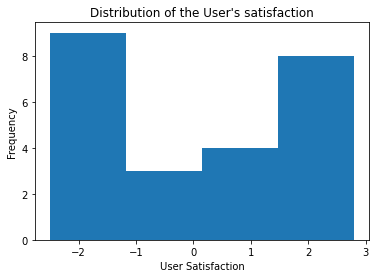

In [18]:
# See the Users Satisfaction distribution

# This is to reduce the bins bias
n_bins = np.sqrt(len(df_sheetB['user_satisfaction']))
n_bins = int(n_bins)

# Make a histogram
plt.hist(df_sheetB['user_satisfaction'], bins = n_bins)
plt.xlabel('User Satisfaction')
plt.ylabel('Frequency')
plt.title("Distribution of the User's satisfaction")
plt.show()

From the users satisfaction distribution, we can see this is not normal distributed. It is slightly skeewed to the right, which means that there are more users that are not satisfied with the grills than the users with high satisfaction.

In [19]:
# See first 5 rows
df_sheetC.head()

,sample_item_index,item_material,is_frozen,grill_type,thumbs_up_score,guess_grill_correct
0,1,Veggie Patty,False,Propane,0.0,True
1,1,Hotdog,False,Propane,0.4,True
2,2,Veggie Patty,True,Propane,0.9,True
3,3,Veggie Patty,False,Propane,0.8,True
4,4,Veggie Patty,True,Propane,0.8,True


In [20]:
# Look for the null-values
for col in df_sheetC.columns:
    print(col)
    print(df_sheetC[col].isna().sum())

sample_item_index
0
item_material
0
is_frozen
0
grill_type
0
thumbs_up_score
0
guess_grill_correct
0


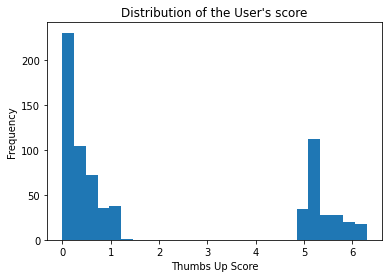

In [21]:
# See the Users Score distribution

#This is to reduce the bins bias
n_bins = np.sqrt(len(df_sheetC['thumbs_up_score']))
n_bins = int(n_bins)

# Make the histogram
plt.hist(df_sheetC['thumbs_up_score'], bins = n_bins)
plt.xlabel('Thumbs Up Score')
plt.ylabel('Frequency')
plt.title("Distribution of the User's score")
plt.show()

The users score is not normal distributed as well. From this graphic we can see that most of the users have a low score to the food prepared with the grill. 

In [22]:
# See first 5 rows of the json data file converted into a dataframe
df_json.head()

,grill_type,is_frozen,item_material,sample_item_index,guess_grill_correct,thumbs_up_score
0,Propane,false,Hotdog,1,true,0.4
1,Propane,true,Hotdog,10,true,1.0
2,Propane,true,Hotdog,10,true,0.0
3,Propane,false,Hotdog,11,true,0.0
4,Propane,true,Hotdog,12,true,0.4


### Bonus Question

In [23]:
# Convert to csv file the file with json format
df_json.to_csv("users_score.csv")

### Question 1

#### Name each sheet/table so they are meaningful standalone.

In [24]:
# Name the first dataset with the title of grills_efficiency.csv
df_sheetA.to_csv('grills_efficiency.csv')

In [25]:
# Name the second data set with the user_satisfaction.csv name
df_sheetB.to_csv('users_satisfaction.csv')

In [26]:
# Name the third dataset with the users_score.csv name
df_sheetC.to_csv('users_score.csv')

### Question 2

#### Which grill type is more fuel efficient based on sheet A? 

###### For this efficiency, we will take into consideration the fuel_cost_per_meal and the initial investment

Since this is just comparison between two grills, I'm making bars to make the comparisons

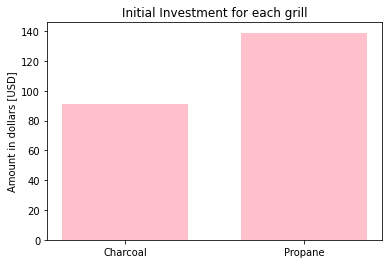

In [27]:
# Comparison between initial investment for each grill
plt.bar(df_sheetA['grill_type'], df_sheetA['initial_investment'], width = 0.7, align = 'center', color = 'pink')
plt.ylabel('Amount in dollars [USD]')
plt.title('Initial Investment for each grill')
plt.show()

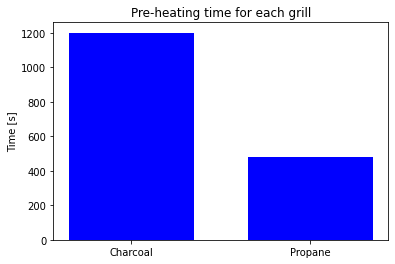

In [28]:
# Comparison between the pre-heating time for each grill
plt.bar(df_sheetA['grill_type'], df_sheetA['pre_heat_time'], width = 0.7, align = 'center', color = 'blue')
plt.ylabel('Time [s]')
plt.title('Pre-heating time for each grill')
plt.show()

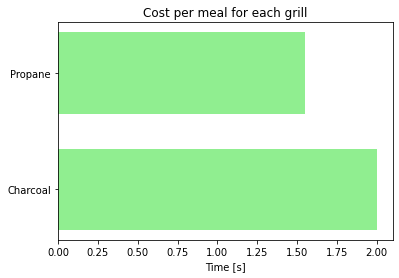

In [29]:
# Comparison between the fuel cost per meal for the grills
plt.barh(df_sheetA['grill_type'], df_sheetA['fuel_cost_per_meal'], height = 0.7, align = 'center', color = 'lightgreen')
plt.xlabel('Time [s]')
plt.title('Cost per meal for each grill')
plt.show()

The charcoal grill requires less initial investment than the propane grill. However, the cost per meal for the propane is less. 

### Question 3 

#### Which grill type has more market share?

###### To answer this question, we are making a single bar chart to see which grill has more market share

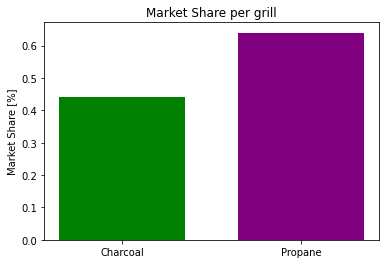

In [30]:
# Bar plot
plt.bar(df_sheetA['grill_type'], df_sheetA['market_share'], width = 0.7, align = 'center', color = ['green', 'purple'])
plt.ylabel('Market Share [%]')
plt.title('Market Share per grill')
plt.show()

##### From the bar chart, we can see that the propane grill has more market share

### Question 3

#### Based on the cookoff data which grill type cost more fuel on a long run?

##### We can use a simple equation, but we prefer to show this as two different linear regressions and check out where they intercept

In [31]:
#Define independent variable(it would be the number of meals)
x = [i for i in range(0,130)]
# Define the y variable for Charcoal
y_char = [91 + 2.00*i for i in x] 
# Define the y variable for Propane
y_prop = [139 + 1.55*i for i in x]

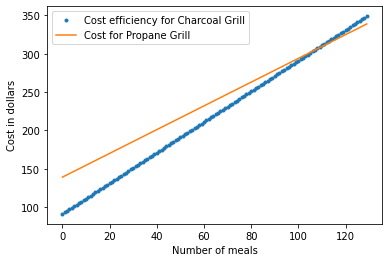

In [32]:
# Plot the lines
plt.plot(x, y_char, '.', label = 'Cost efficiency for Charcoal Grill')
plt.plot(x, y_prop, label = 'Cost for Propane Grill')
plt.xlabel('Number of meals')
plt.ylabel('Cost in dollars')
plt.legend(loc = 'best')
plt.show()

##### On the long-run, the Charcoal Grill is more expensive

#### To answer the question, from the linear regression, we can see that the break-even is close to 100 meals. If you are cooking less than 100 meals during the three years life expectancy for the grill, it would be cheaper the Charcoal Grill. Otherwise, it would be cheaper the Propane Grill


#### It is very difficult to reach the 100 meals during the three years because people have to work, they don't have so any vacations, also the winter does not allow to use it some times, so I would say the Charcoal Grill is more fuel efficient than the propane grill

### Question 4

#### Considering that the average American grill owner buys a new grill every three years, which grill type would cost more based on the fuel cost and initial investment? 

By taking into consideration what the video said, the Propane Grill would cost more because Americans do not use the Grill 100 times during the three years. They just use the Grill around 16 times during the three years.

### Question 5

#### Which grill type is easier to use based on the user satisfaction score?  Based on data, which grill is preferred? What factors might play a role? 

In [33]:
# Firstly we are dividing the datasets to take the average
df_user_satisfaction_char = df_sheetB.loc[df_sheetB['grill_type'] == 'Charcoal']
df_user_satisfaction_prop = df_sheetB.loc[df_sheetB['grill_type'] == 'Propane']

In [34]:
# Calculation of the mean
mean_char = df_user_satisfaction_char['user_satisfaction'].mean()
mean_prop = df_user_satisfaction_prop['user_satisfaction'].mean()

In [35]:
#Make the graphics comparing the user's satisfaction
x = ['Charcoal', 'Propane']
y = [mean_char, mean_prop]

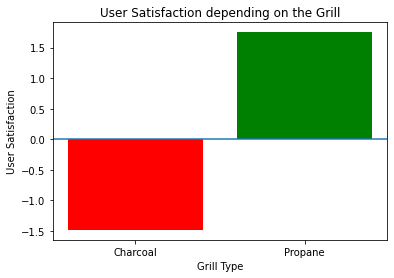

In [36]:
# Plot the mean of each grill type
plt.bar(x, y, color = ['red', 'green'])
plt.xlabel('Grill Type')
plt.ylabel('User Satisfaction')
plt.axhline(0)
plt.title('User Satisfaction depending on the Grill')
plt.show()

##### I want to see if any other variables have influence on the user satisfaction

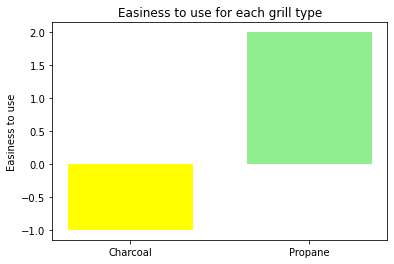

In [37]:
# Firstly I will plot the easiness to use of each grill
plt.bar(df_sheetA['grill_type'], df_sheetA['easiness_to_use'], width = 0.7, align = 'center', color = ['yellow', 'lightgreen'])
plt.ylabel('Easiness to use')
plt.title('Easiness to use for each grill type')
plt.show()

In [38]:
# Group by grill type
groups = df_sheetB.groupby('grill_type').agg({'user_satisfaction':'mean', 'fuel_cost': 'sum'}).reset_index()
groups

,grill_type,user_satisfaction,fuel_cost
0,Charcoal,-1.483333,4570.681
1,Propane,1.750000,1897.300


In [39]:
# Group by grill type and item_material 
groups2 = df_sheetB.groupby(['grill_type', 'item_material']).agg({'user_satisfaction':'mean', 'fuel_cost': 'sum'}
                                                              ).reset_index()

In [40]:
groups2

,grill_type,item_material,user_satisfaction,fuel_cost
0,Charcoal,Ground Beef Patty,-1.600,1592.229
1,Charcoal,Hotdog,-1.525,1476.880
2,Charcoal,Veggie Patty,-1.325,1501.572
3,Propane,Ground Beef Patty,2.150,686.775
4,Propane,Hotdog,1.550,605.950
5,Propane,Veggie Patty,1.550,604.575


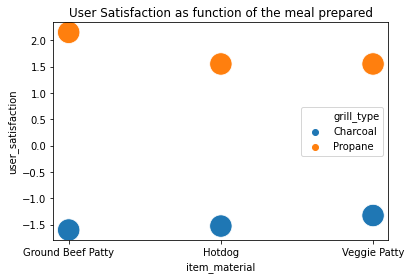

In [41]:
# Plot the user satisfaction as function of the meal prepared
sns.scatterplot(x='item_material', y='user_satisfaction', data=groups2, hue='grill_type', s = 500)
plt.title('User Satisfaction as function of the meal prepared')
plt.show()

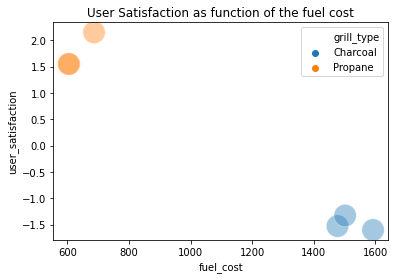

In [42]:
# Plot the user satisfaction as function of the fuel cost
sns.scatterplot(x='fuel_cost', y='user_satisfaction', data=groups2, hue='grill_type', s = 500, alpha = 0.4)
plt.title('User Satisfaction as function of the fuel cost')
plt.legend(loc = 'best')
plt.show()

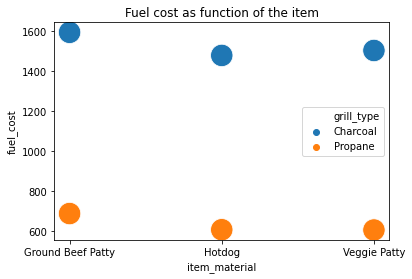

In [43]:
# Plot the meal prepared as function of the fuel cost
sns.scatterplot(x='item_material', y='fuel_cost', data=groups2, hue='grill_type', s = 500)
plt.title('Fuel cost as function of the item')
plt.legend(loc = 'best')
plt.show()

###### From the dataset, we can see that the Propane Grill has in average more user satisfaction than the Charcoal Grill, so generally speaking, Americans prefer the Propane Grill. 

###### Possible reasons: How easy is to control the temperature, clean after use,  and time required to prepare the meal. In all of these reasons, Propane grill is better. No ashes after preparing the meal, we can control the temperature with a thermostat, and less time of pre-heating. Additionally, the fuel costs no matter the meal is lower for the propane grill.

### Question 6

#### Please generate an aggregated dataset to present your conclusions. 

In [44]:
# Create an aggregate data to see if the frozen has influence on the score
group3 = df_sheetC.groupby(['item_material', 'grill_type','is_frozen', 'guess_grill_correct']).agg(
    {'thumbs_up_score':'mean'})
group3

thumbs_up_score
item_material     grill_type is_frozen guess_grill_correct                 
Ground Beef Patty Charcoal   False     False                       0.109091
                                       True                        0.212245
                             True      False                       0.157143
                                       True                        0.166038
                  Propane    False     False                       5.400000
                                       True                        5.577586
                             True      False                       5.600000
                                       True                        5.601724
Hotdog            Charcoal   False     False                       5.083333
                                       True                        5.209259
                             True      False                       5.300000
                                       True                        5.189831
                  Propane    False     False                       0.400000
                                       True                        0.569231
                             True      False                       0.438462
                                       True                        0.582979
Veggie Patty      Charcoal   False     False                       0.080000
                                       True                        0.160000
                             True      False                       0.300000
                                       True                        0.148077
                  Propane    False     False                       0.516667
                                       True                        0.533333
                             True      False                       0.512500
                                       True                        0.550000

In [45]:
group3.to_csv('aggregated_table.csv')

From this aggregate datasets we can make different conclusions:

- There is not a significant difference of score between the frozen and not frozen items.
- For Hotdogs, the Charcoal score was so much higher than the propane hotdog
- For Groundbeef, the propane grill had a so much better score than the charcoal grill
- For the Veggie Patty item, the Propane had a better score as well, but not as significant as the Ground Beef. 
- There is not a big difference of score if they whether guessed correctly the grill type or not.

### Question 7

#### Are your recommendations to the manufacturer different to recommendations you’d make to the user? 

Yes

#### Manufacturer Recommendations

- Charcoal

Work how to make them easier to use. Maybe the option of a thermostat will increase user's satisfaction.

The ground beefs require more expertise. By making the grill easier to use, by default you would be increasing the ground beef scores with this grill. 

              
- Propane

With a lower initial investment, this will make this grill have even more market share.
Also, if they improve the Hotdogs preparation with their grills, they may have more market share.


#### User's Recommendations

Based on the insights I just got, I would not see a reason why to have a Charcoal grill if I am a normal person with no deep knowledge on how to use the grill. For me, the propane grill it is easier to use, I don't have to clean the ashes, it takes less time and if I want to use it a lot, I will see future savings. I would probably have better ground beefs and veggie patty which is even better
If I am an experienced person who loves making Hot Dogs and does not mind cleaning after use, I would choose to have a Charcoal grill. Even though it would take me more time on the pre-heating, I would prepare better Hot Dogs rather than if I am using the Propane Grill. 

Generally speaking, and important to point out, propane grill is better than the charcoal grill.
